# Logistic Regression
- Iris dataset
- Binary classification

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from PlotFunction import plot_decision_surface_train_test, plot_decision_surface_predict

In [11]:
iris = datasets.load_iris()

In [12]:
# Extract the last 2 columns
X = iris.data[:, 2:4]
y = iris.target

In [13]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)


In [14]:
# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [21]:
solver='lbfgs'
C=0.0001
max_iter=100

In [22]:
lr = LogisticRegression(
    random_state=1,
    verbose=0,
    solver=solver,
    C=C,
    max_iter=max_iter)

In [23]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=0.0001, random_state=1)

In [ ]:
y_pred = lr.predict(X_test_std)

In [ ]:
sumMiss = (y_test != y_pred).sum()

In [ ]:
accuracyScore = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Misclassified examples: {sumMiss}")
print(f"Accuracy score: {accuracyScore}")
print(f"Norm of W: {np.linalg.norm(lr.coef_)}")
# Print the probability of each class
# lr.predict_proba(X_test_std[:2,:])

In [15]:
# param = "ex2"
paramSet = {
    "ex1": {"solver": "lbfgs", "C": 0.0001, "max_iter": 100},
    "ex2": {"solver": "lbfgs", "C": 0.01, "max_iter": 100},
    "ex3": {"solver": "lbfgs", "C": 1, "max_iter": 100},
    "ex4": {"solver": "lbfgs", "C": 100, "max_iter": 100},
    "ex5": {"solver": "lbfgs", "C": 10000, "max_iter": 100},
}

Misclassified examples: 15
Accuracy score: 0.6666666666666666
Norm of W: 0.008225699269087432
Misclassified examples: 10
Accuracy score: 0.7777777777777778
Norm of W: 0.5080516881527405
Misclassified examples: 1
Accuracy score: 0.9777777777777777
Norm of W: 4.5061151598045734
Misclassified examples: 1
Accuracy score: 0.9777777777777777
Norm of W: 14.12160044479269
Misclassified examples: 1
Accuracy score: 0.9777777777777777
Norm of W: 20.93773288504392


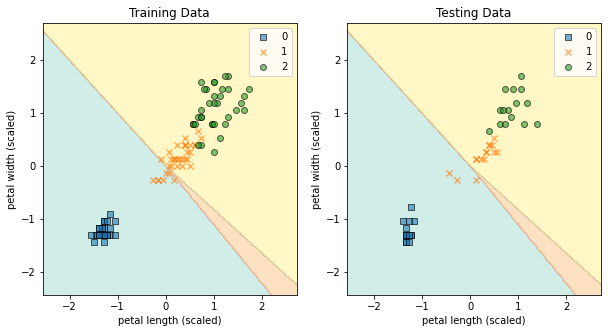

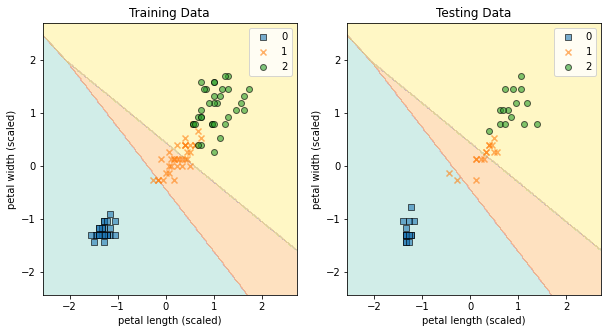

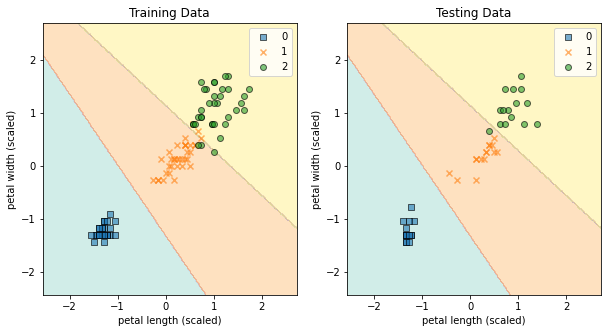

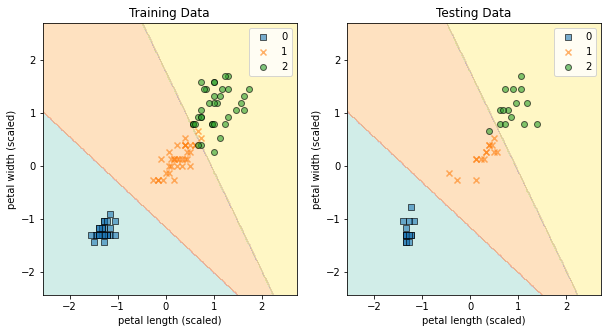

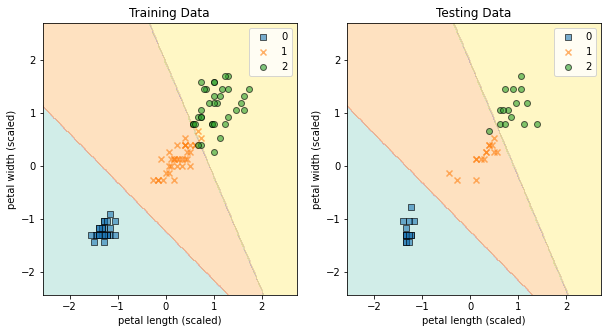

In [20]:
for param, _ in paramSet.items():
    lr = LogisticRegression(
        random_state=1,
        verbose=0,
        solver=paramSet[param]["solver"],
        C=paramSet[param]["C"],
        max_iter=paramSet[param]["max_iter"],
    )

    # Training
    lr.fit(X_train_std, y_train)

    # Prediction
    y_pred = lr.predict(X_test_std)

    # Misclassification from the test samples
    sumMiss = (y_test != y_pred).sum()

    # Accuracy score from the test samples
    accuracyScore = accuracy_score(y_test, y_pred)

    print(f"Misclassified examples: {sumMiss}")
    print(f"Accuracy score: {accuracyScore}")
    print(f"Norm of W: {np.linalg.norm(lr.coef_)}")
    # Print the probability of each class
    # lr.predict_proba(X_test_std[:2,:])

    # Plot decision regions
    plot_decision_surface_train_test(
        X_train_std, X_test_std, y_train, y_test, lr, filename=f"Images/T21_Logistic_Regression_{param}.png"
    )

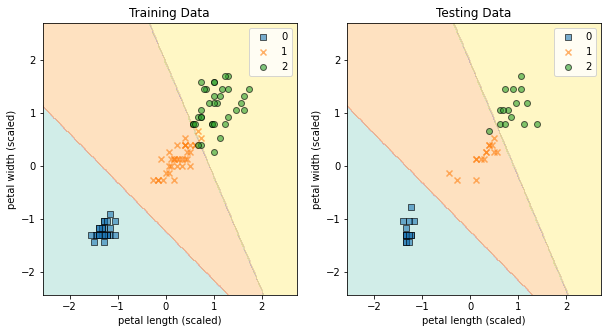

In [17]:
plot_decision_surface_train_test(X_train_std, X_test_std, y_train, y_test, lr, filename="Images/T21_Img_Logistic_Regression.png")